In [ ]:
#!pip install psycopg2

In [ ]:
#!pip install cfg_load[all]

In [1]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sqlalchemy import create_engine
import databaseconfig as cfg

engine = create_engine(f"postgresql+psycopg2://{cfg.mysql['user']}:{cfg.mysql['password']}@{cfg.mysql['host']}:{cfg.mysql['port']}/{cfg.mysql['database']}")

connection = engine.connect()

In [3]:
# Query All Records in the Employees Table
data = pd.read_sql("SELECT * FROM Salaries", connection)

In [4]:
data.head()

,emp_no,salary,from_date,to_date
0,10001,60117,1986-06-26,1987-06-26
1,10002,65828,1996-08-03,1997-08-03
2,10003,40006,1995-12-03,1996-12-02
3,10004,40054,1986-12-01,1987-12-01
4,10005,78228,1989-09-12,1990-09-12


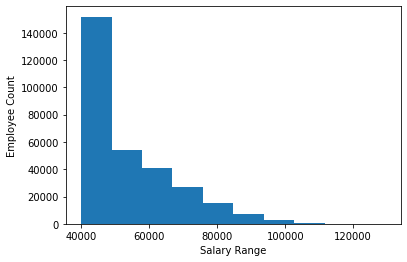

In [5]:
plt.hist(data['salary'])
plt.xlabel('Salary Range')
plt.ylabel('Employee Count')
plt.show()

In [6]:
data2 = pd.read_sql("SELECT * FROM Titles", connection)
data2.head()

,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,9999-01-01
1,10002,Staff,1996-08-03,9999-01-01
2,10003,Senior Engineer,1995-12-03,9999-01-01
3,10004,Engineer,1986-12-01,1995-12-01
4,10004,Senior Engineer,1995-12-01,9999-01-01


In [7]:
merged = pd.merge(data, data2, on='emp_no', suffixes=("_salary","_title"))
merged

,emp_no,salary,from_date_salary,to_date_salary,title,from_date_title,to_date_title
0,10001,60117,1986-06-26,1987-06-26,Senior Engineer,1986-06-26,9999-01-01
1,10002,65828,1996-08-03,1997-08-03,Staff,1996-08-03,9999-01-01
2,10003,40006,1995-12-03,1996-12-02,Senior Engineer,1995-12-03,9999-01-01
3,10004,40054,1986-12-01,1987-12-01,Engineer,1986-12-01,1995-12-01
4,10004,40054,1986-12-01,1987-12-01,Senior Engineer,1995-12-01,9999-01-01
...,...,...,...,...,...,...,...
443303,499997,49597,1987-08-30,1988-08-29,Engineer,1987-08-30,1992-08-29
443304,499997,49597,1987-08-30,1988-08-29,Senior Engineer,1992-08-29,9999-01-01
443305,499998,40000,1993-12-27,1994-12-27,Senior Staff,1998-12-27,9999-01-01
443306,499998,40000,1993-12-27,1994-12-27,Staff,1993-12-27,1998-12-27


In [11]:
grouped = merged.groupby(['title'])
grouped = grouped['salary'].mean()
grouped = grouped.to_frame()
grouped

,salary
title,
Assistant Engineer,48493.204786
Engineer,48539.781423
Manager,51531.041667
Senior Engineer,48506.751806
Senior Staff,58503.286614
Staff,58465.271904
Technique Leader,48580.505772


(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

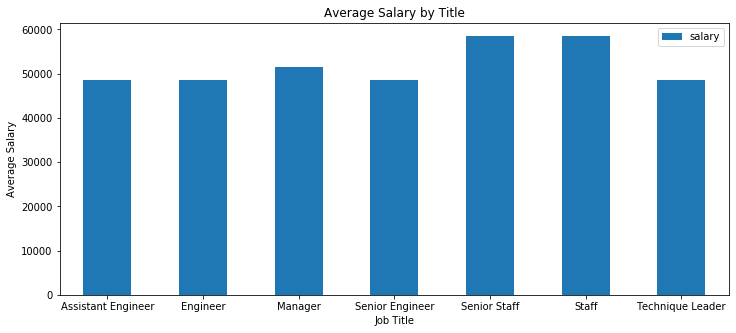

In [15]:
bar = grouped.plot(kind='bar', width=0.5, figsize=(12,5))
plt.title("Average Salary by Title")
plt.xlabel("Job Title")
plt.ylabel("Average Salary")
plt.xticks(rotation=360)